# **Problem Statement**:
Create a predictive model to forecast the Covid19 cases based on past cases for a
India.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



load data

In [ ]:
data_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
data_death = pd.read_csv("/content/time_series_covid19_deaths_global.csv")
data_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")

In [ ]:
data_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9

In [ ]:
data_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [ ]:
pd.set_option('display.max_columns', None)
data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.

In [ ]:
data_confirmed['Province/State'].isnull().sum()

np.int64(185)

In [ ]:
for i,col in enumerate(data_confirmed):
  print(data_confirmed[col].isnull().sum())


185
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
data_confirmed.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,int64
...,...
9/17/20,int64
9/18/20,int64
9/19/20,int64
9/20/20,int64


In [ ]:
data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [ ]:
data_confirmed.isnull().sum()

,0
Province/State,185
Country/Region,0
Lat,0
Long,0
1/22/20,0
...,...
9/17/20,0
9/18/20,0
9/19/20,0
9/20/20,0


In [ ]:
data_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,61

In [ ]:
data_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0

Insights:
* Three datasets (data_confirmed, data_death, and data_recovered) have been successfully loaded into pandas DataFrames.

* Each dataset has 266 rows and 248 columns.
*  Most columns are of integer type, representing case counts on specific dates. There are also a few object (string) columns for 'Province/State' and 'Country/Region', and float columns for 'Lat' and 'Long'.
* Missing Values: The 'Province/State' column has a significant number of missing values (185 out of 266 rows). Other columns, including the date columns, have no missing values based on the .isnull().sum() output.
* The date columns cover the period from '1/22/20' to '9/21/20'.
* The .describe() output shows summary statistics for the numerical columns (date columns, Lat, and Long). The case counts increase over time, as expected for a pandemic dataset.

# **Data Cleaning**

**melt all datasets to set dates as index**

In [ ]:
#confirmed dataset
confirmed_new = data_confirmed.melt(
    id_vars = ['Province/State','Country/Region','Lat','Long'],
    var_name = 'Date',
    value_name = 'Confirmed'
)

In [ ]:
confirmed_new.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
confirmed_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  19764 non-null  object 
 1   Country/Region  64904 non-null  object 
 2   Lat             64904 non-null  float64
 3   Long            64904 non-null  float64
 4   Date            64904 non-null  object 
 5   Confirmed       64904 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
#death dataset
death_new = data_death.melt(
    id_vars =['Province/State','Country/Region','Lat','Long'],
    var_name ='Date',
    value_name = 'Death'
)

In [ ]:
death_new.head(10)

,Province/State,Country/Region,Lat,Long,Date,Death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0
5,NaN,Antigua and Barbuda,17.06080,-61.796400,1/22/20,0
6,NaN,Argentina,-38.41610,-63.616700,1/22/20,0
7,NaN,Armenia,40.06910,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.47350,149.012400,1/22/20,0
9,New South Wales,Australia,-33.86880,151.209300,1/22/20,0


In [ ]:
death_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  19764 non-null  object 
 1   Country/Region  64904 non-null  object 
 2   Lat             64904 non-null  float64
 3   Long            64904 non-null  float64
 4   Date            64904 non-null  object 
 5   Death           64904 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
#recovered dataset
recovered_new = data_recovered.melt(
    id_vars =['Province/State','Country/Region','Lat','Long'],
    var_name ='Date',
    value_name ='Recovered'
)

In [ ]:
recovered_new.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
recovered_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61732 entries, 0 to 61731
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  16348 non-null  object 
 1   Country/Region  61732 non-null  object 
 2   Lat             61732 non-null  float64
 3   Long            61732 non-null  float64
 4   Date            61732 non-null  object 
 5   Recovered       61732 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ MB


convert date column to datetime datatype from object

In [ ]:
#convert date column to datetime datatype from object
from datetime import datetime
confirmed_new['Date']=pd.to_datetime(confirmed_new['Date'])
death_new['Date']=pd.to_datetime(death_new['Date'])
recovered_new['Date']=pd.to_datetime(recovered_new['Date'])

In [ ]:
confirmed_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19764 non-null  object        
 1   Country/Region  64904 non-null  object        
 2   Lat             64904 non-null  float64       
 3   Long            64904 non-null  float64       
 4   Date            64904 non-null  datetime64[ns]
 5   Confirmed       64904 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
death_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19764 non-null  object        
 1   Country/Region  64904 non-null  object        
 2   Lat             64904 non-null  float64       
 3   Long            64904 non-null  float64       
 4   Date            64904 non-null  datetime64[ns]
 5   Death           64904 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
recovered_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61732 entries, 0 to 61731
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  16348 non-null  object        
 1   Country/Region  61732 non-null  object        
 2   Lat             61732 non-null  float64       
 3   Long            61732 non-null  float64       
 4   Date            61732 non-null  datetime64[ns]
 5   Recovered       61732 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
#merge all three datasets into one using left join
new_data = confirmed_new.merge(death_new, on=['Province/State','Country/Region','Lat','Long','Date'], how='left')

data = new_data.merge(recovered_new, on=['Province/State','Country/Region','Lat','Long','Date'], how='left')


In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [ ]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
64899,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265,24428.0
64900,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1,8.0
64901,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586,1235.0
64902,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331,13629.0
64903,NaN,Zimbabwe,-19.015438,29.154857,2020-09-21,7683,225,5924.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19764 non-null  object        
 1   Country/Region  64904 non-null  object        
 2   Lat             64904 non-null  float64       
 3   Long            64904 non-null  float64       
 4   Date            64904 non-null  datetime64[ns]
 5   Confirmed       64904 non-null  int64         
 6   Death           64904 non-null  int64         
 7   Recovered       60268 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# for convineince changing renaming named of columns
data = data.rename(columns={'Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                   'Date':'date','Confirmed':'confirmed',"Death":'death','Recovered':'recovered'})

In [ ]:
data.isnull().sum()

,0
state,45140
country,0
lat,0
long,0
date,0
confirmed,0
death,0
recovered,4636


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      19764 non-null  object        
 1   country    64904 non-null  object        
 2   lat        64904 non-null  float64       
 3   long       64904 non-null  float64       
 4   date       64904 non-null  datetime64[ns]
 5   confirmed  64904 non-null  int64         
 6   death      64904 non-null  int64         
 7   recovered  60268 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
data.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'death',
       'recovered'],
      dtype='object')

In [ ]:
data.recovered.isnull().sum()

np.int64(4636)

In [ ]:
data.recovered.fillna(0,inplace=True)

In [ ]:
data.recovered.isnull().sum()

np.int64(0)

In [ ]:
data.set_index('date',inplace=True)

In [ ]:
data.head()

,state,country,lat,long,confirmed,death,recovered
date,,,,,,,
2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0.0
2020-01-22,NaN,Albania,41.15330,20.168300,0,0,0.0
2020-01-22,NaN,Algeria,28.03390,1.659600,0,0,0.0
2020-01-22,NaN,Andorra,42.50630,1.521800,0,0,0.0
2020-01-22,NaN,Angola,-11.20270,17.873900,0,0,0.0


**Insights**:
*  There are three datasets one is data with people who confirmed +ve with covid 19,and second(data) with people died with covid 19,and last was people who are recovered from covid 19

*  converted date columns to single column using merge syntax,the data was saved under confirmed,death,recovered

*  merged three dataframes into one for convinience and to draw insights from exploratory data analysis

*  handled null values in recovered column

*  droped state column with almost null values,even i want to forecasting using country column

* kept date column as index

**finally**:
the data is clean and  ready for exploratory data analysis

# **Exploratory Data Analysis**

In [ ]:
#created new column with active cases
data['active'] = data.confirmed-data.death-data.recovered

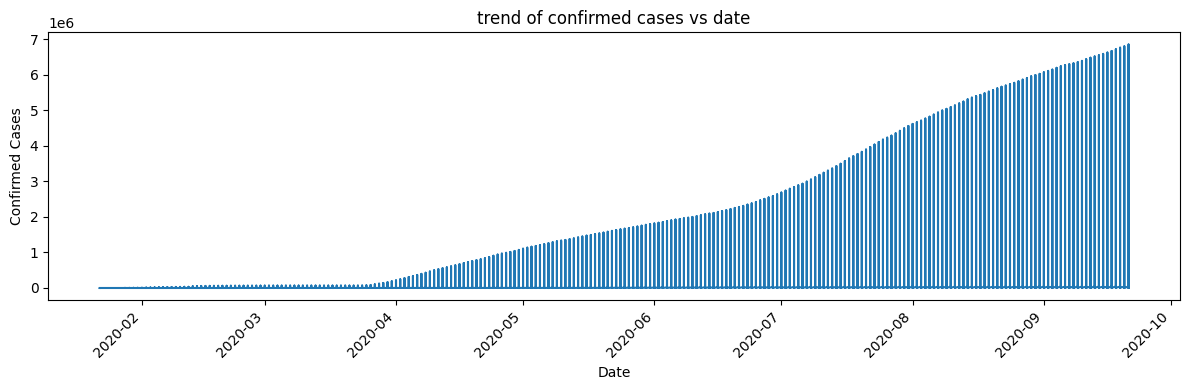

In [ ]:
#trend over confirmed cases
data.confirmed.plot(figsize=(12,4))
plt.title('trend of confirmed cases vs date')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* The plot of data.confirmed shows a clear upward trend in the number of confirmed cases over time. The curve is steadily increasing from January 2020 to September 2020, indicating a continuous rise in global confirmed COVID-19 cases during this period.


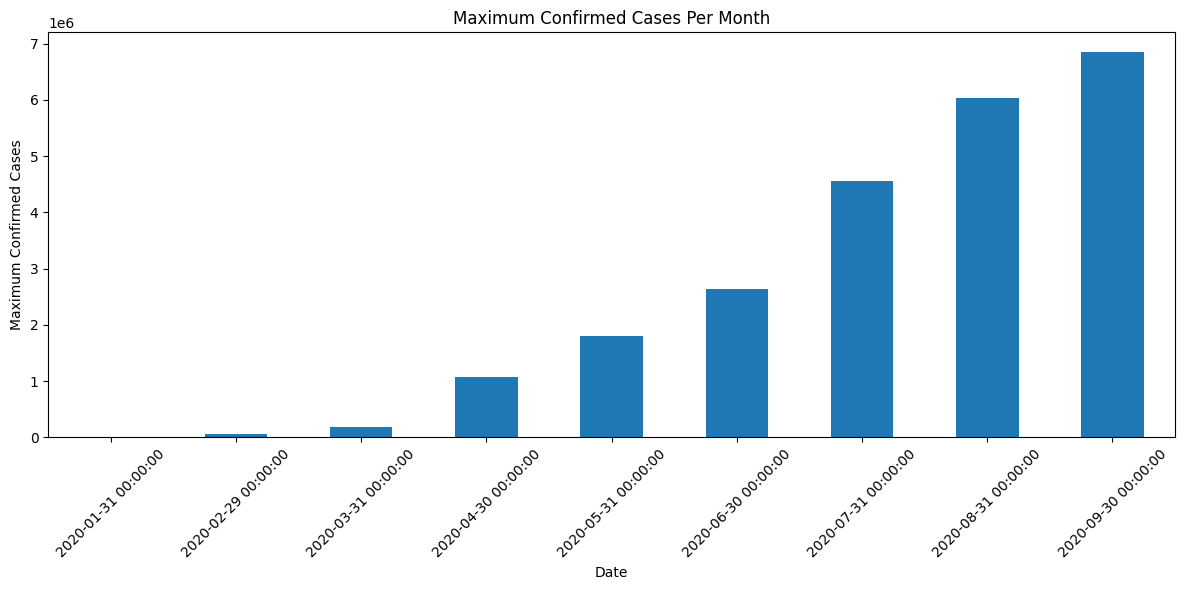

In [ ]:
#trend of confirmed cases in permonth
data.confirmed.resample(rule='m').max().plot(kind='bar',figsize=(12,6))
plt.title('Maximum Confirmed Cases Per Month')
plt.xlabel('Date')
plt.ylabel('Maximum Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* The bar plot of the maximum confirmed cases per month clearly shows a significant increase in confirmed cases over time, with each subsequent month having a higher peak than the previous one. This visually reinforces the upward trend observed in the line plot and highlights the accelerating nature of the pandemic during this period.

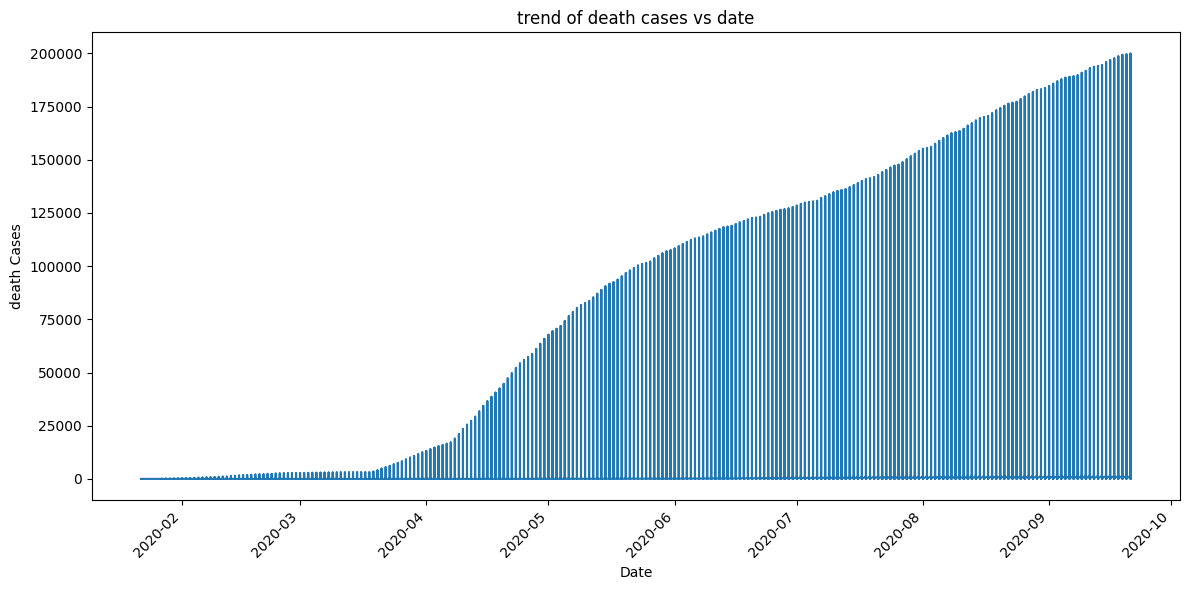

In [ ]:
#trend of death cases vs date
data.death.plot(figsize=(12,6))
plt.title('trend of death cases vs date')
plt.xlabel('Date')
plt.ylabel('death Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* The plot of data.death shows an increasing trend in the number of death cases over time, similar to the confirmed cases. The curve rises steadily from January to September 2020, indicating a continuous increase in global COVID-19 deaths during this period.

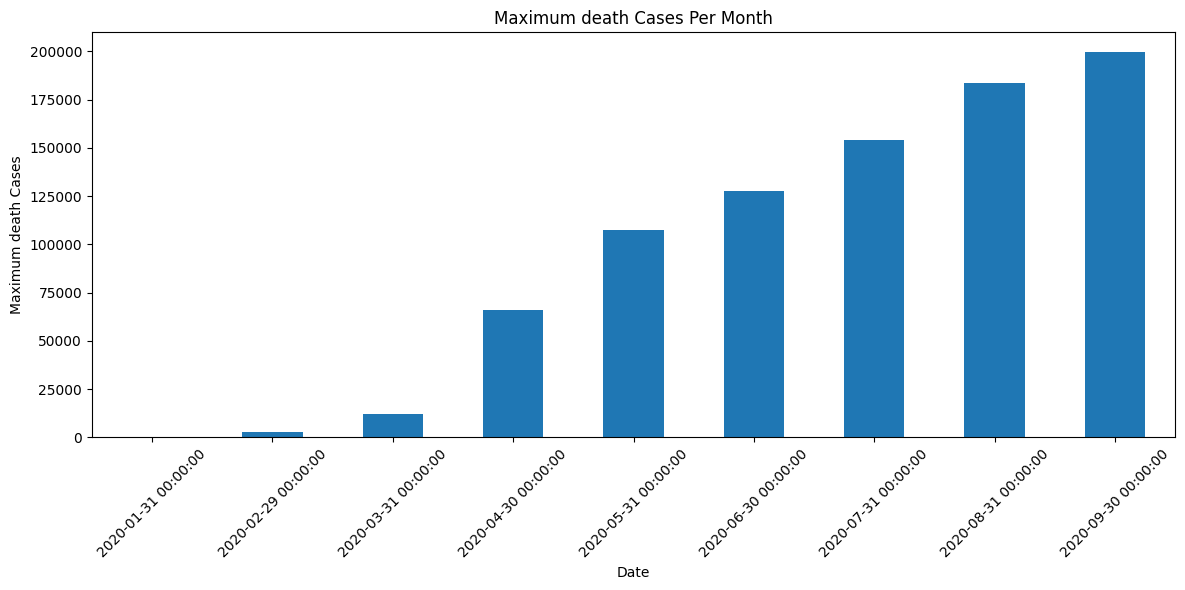

In [ ]:
#trend of death cases per month
data.death.resample(rule='m').max().plot(kind='bar',figsize=(12,6))
plt.title('Maximum death Cases Per Month')
plt.xlabel('Date')
plt.ylabel('Maximum death Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* This bar plot shows the maximum number of deaths recorded each month. Similar to the confirmed cases, the number of deaths also shows a clear increasing trend month over month. This indicates that as the pandemic progressed, the monthly peak of reported deaths continued to rise throughout the period.

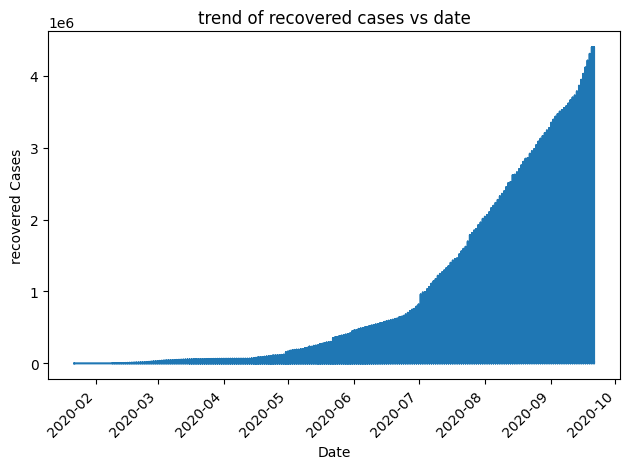

In [ ]:
#trend of recovered cases vs date
data.recovered.plot()
plt.title('trend of recovered cases vs date')
plt.xlabel('Date')
plt.ylabel('recovered Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* The plot of data.recovered shows a steady increase in the number of recovered cases over time, starting slowly and then accelerating from around April 2020 onwards. This indicates that as the pandemic progressed and the number of confirmed cases grew, the number of people recovering also significantly increased.

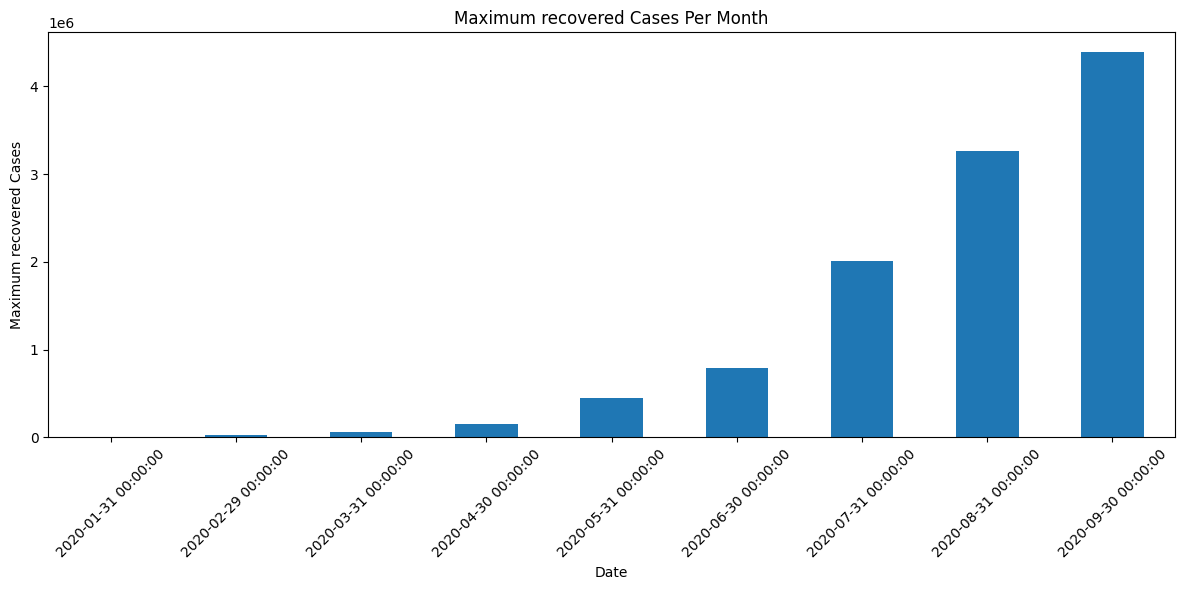

In [ ]:
#Maximum recovered Cases Per Month
data.recovered.resample(rule='m').max().plot(kind='bar',figsize=(12,6))
plt.title('Maximum recovered Cases Per Month')
plt.xlabel('Date')
plt.ylabel('Maximum recovered Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* This bar plot illustrates the maximum number of recovered cases reported each month. The trend mirrors that of confirmed and death cases, showing a consistent increase month over month. This highlights the growing number of recoveries as the pandemic progressed through this period.

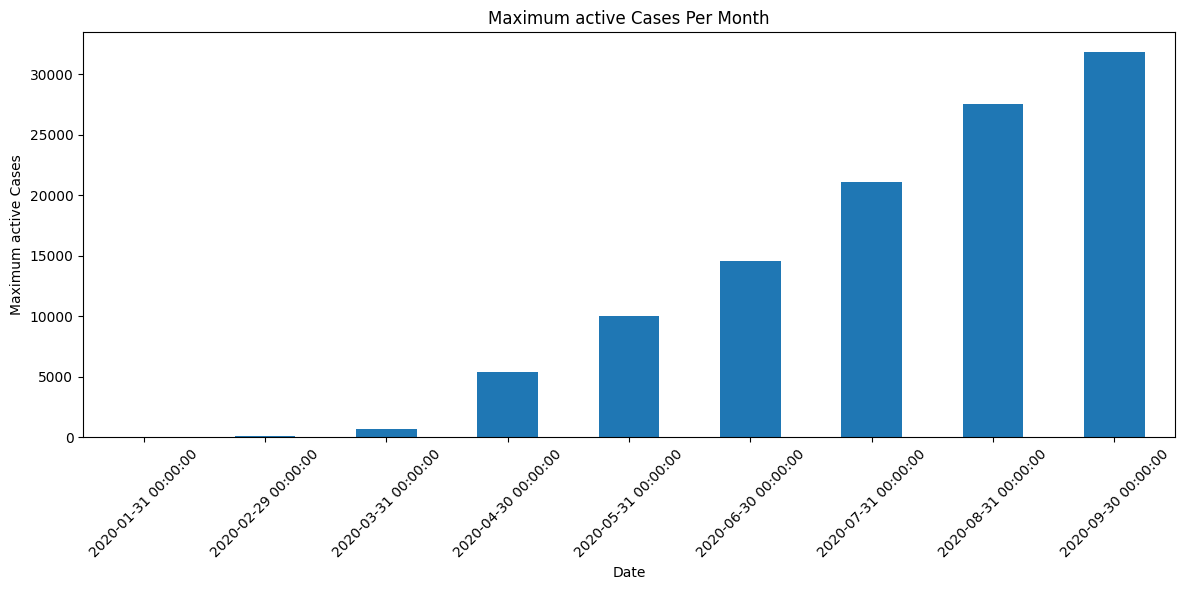

In [ ]:
#trend of active cases per month
data.active.resample(rule='m').mean().plot(kind='bar',figsize=(12,6))
plt.title('Maximum active Cases Per Month')
plt.xlabel('Date')
plt.ylabel('Maximum active Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
* This bar plot illustrates the maximum number of recovered cases reported each month. The trend mirrors that of confirmed and death cases, showing a consistent increase month over month. This highlights the growing number of recoveries as the pandemic progressed through this period.

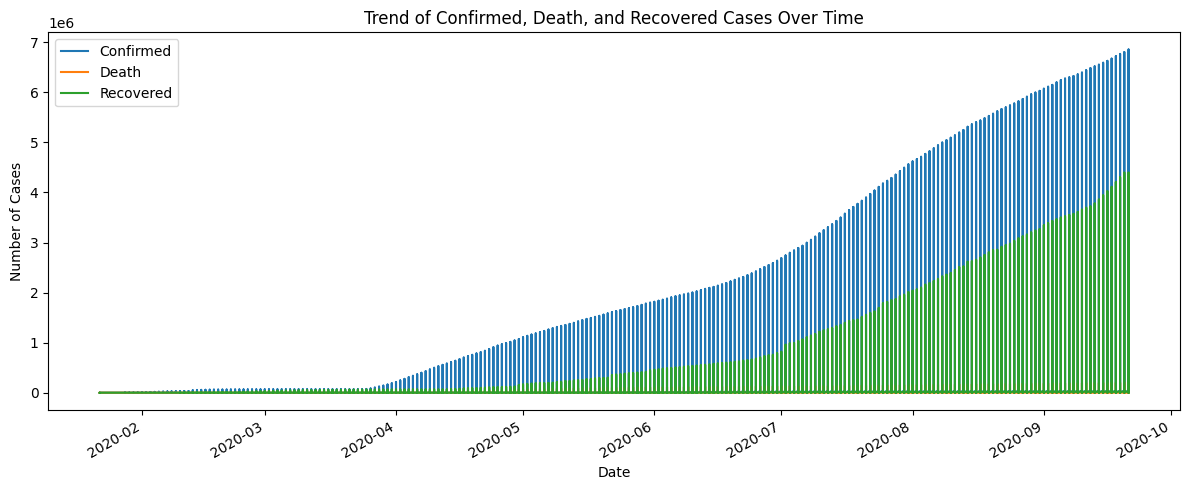

In [ ]:
#Trend of Confirmed, Death, and Recovered Cases Over Time
data[['confirmed','death','recovered']].plot(figsize =(12,5))
plt.title('Trend of Confirmed, Death, and Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(['Confirmed', 'Death', 'Recovered'])
plt.tight_layout()
plt.show()

Insights:
* All three metrics show an increasing trend throughout the period.
The number of confirmed cases is the highest, followed by recovered cases, and then death cases.

* The gap between confirmed cases and recovered cases appears to widen over time, indicating that the rate of new confirmed cases is higher than the rate of recovery.

* The number of death cases remains significantly lower than both confirmed and recovered cases, although it also shows a clear upward trend.

##**country level analysis**

In [ ]:
#grouping the countries according to confirmed,recovered,death and active
country_data = data.groupby('country')[['confirmed','death','recovered','active']].sum().reset_index()
display(country_data)

,country,confirmed,death,recovered,active
0,Afghanistan,4056576,126077,2398631.0,1531868.0
1,Albania,679314,20165,384363.0,274786.0
2,Algeria,3483151,158731,2367555.0,956865.0
3,Andorra,158056,8376,119743.0,29937.0
4,Angola,155898,6645,57229.0,92024.0
...,...,...,...,...,...
183,West Bank and Gaza,1419283,9603,800335.0,609345.0
184,Western Sahara,1461,119,1096.0,246.0
185,Yemen,173715,48329,83523.0,41863.0
186,Zambia,721797,17339,608001.0,96457.0


###**top 10 confirmed cases**

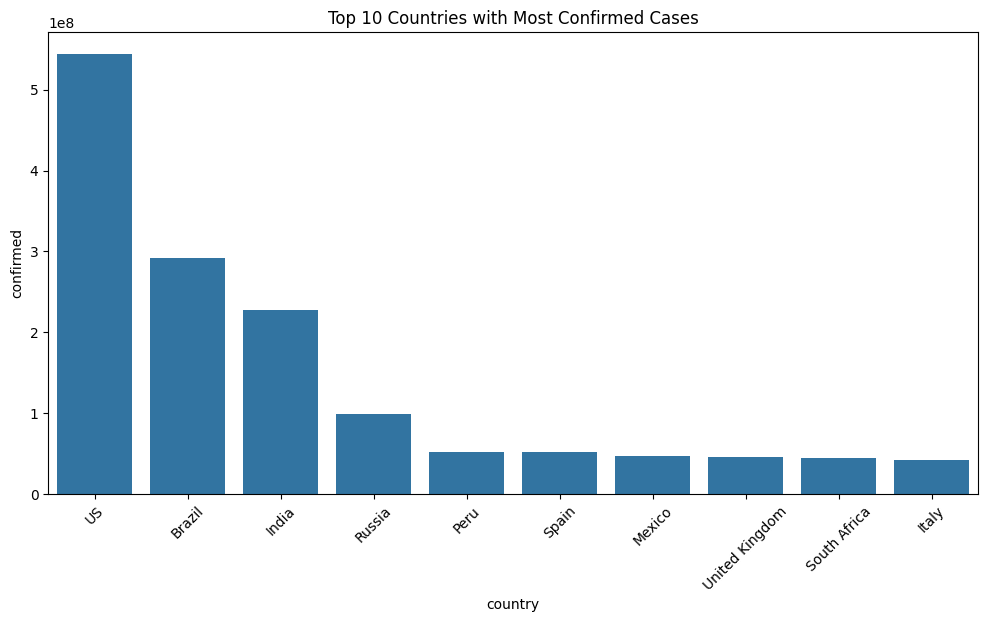

In [ ]:
top_10_confirmed = country_data.sort_values('confirmed', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='confirmed', data=top_10_confirmed)
plt.title('Top 10 Countries with Most Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

Insights:
* The United States has the highest number of confirmed cases by a significant margin.
* Brazil and India have the second and third highest numbers of confirmed cases, respectively, also with very high counts.
* The remaining countries in the top 10 have considerably lower confirmed case numbers compared to the top three.
* This highlights the unequal distribution of confirmed cases across countries during this period, with a few nations bearing a much larger burden.

###**top 10 countries recovered**

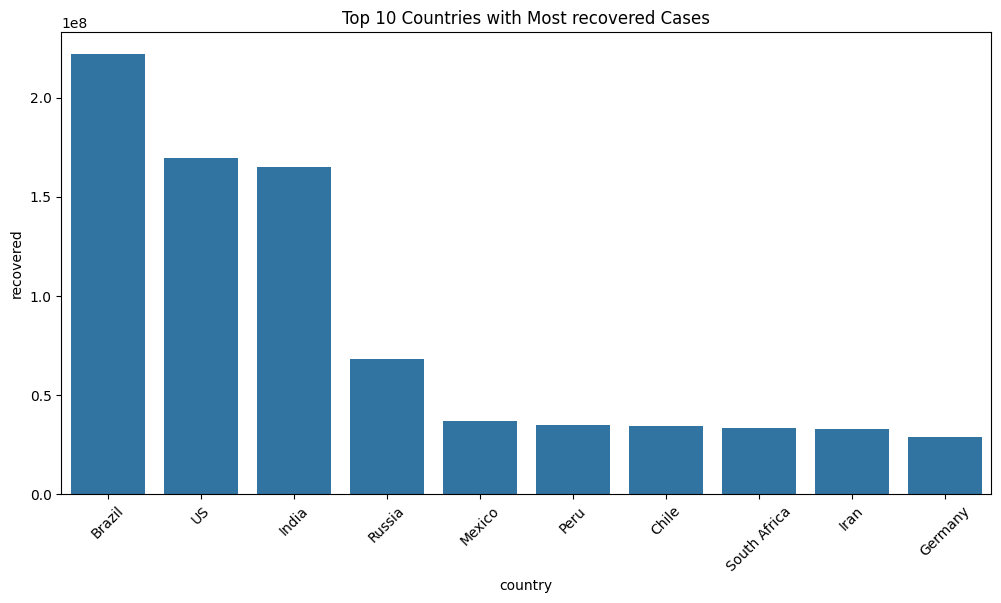

In [ ]:

#top 10 countries recovered
top_10_recovered = country_data.sort_values('recovered', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='recovered', data=top_10_recovered)
plt.title('Top 10 Countries with Most recovered Cases')
plt.xticks(rotation=45)
plt.show()

Insights:
* Brazil, the US, and India have the highest number of recovered cases, aligning with their high confirmed case numbers.
* Russia, Mexico, and Peru also show a significant number of recovered cases.
* The graph indicates that a substantial number of people have recovered from COVID-19 in these most affected countries.

###**top 10 countries with most death cases**

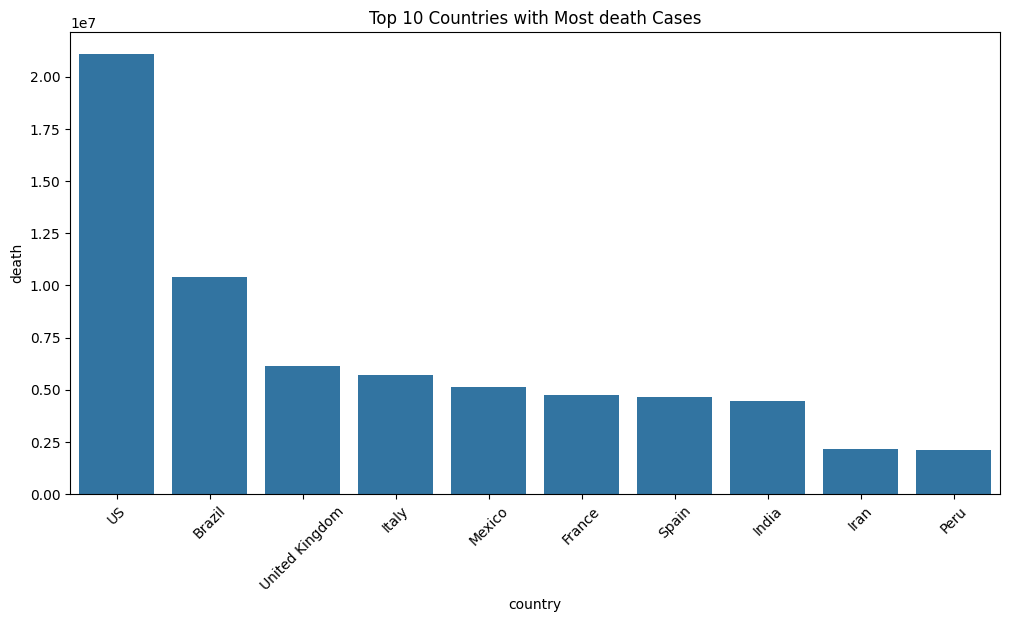

In [ ]:
#top 10 countries with most death cases
top_10_death = country_data.sort_values('death', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='death', data=top_10_death)
plt.title('Top 10 Countries with Most death Cases')
plt.xticks(rotation=45)
plt.show()

Insights:
* The US has the highest number of deaths by a significant margin, followed by Brazil.
* The United Kingdom, Italy, Mexico, France, Spain, and India also have high death tolls, but considerably lower than the US and Brazil.
* Iran and Peru round out the top 10, with a lower number of deaths compared to the other countries in the top list.
* This indicates that the mortality rate or the sheer number of cases has led to a high number of deaths in these countries.

###top 10 countries with most active cases

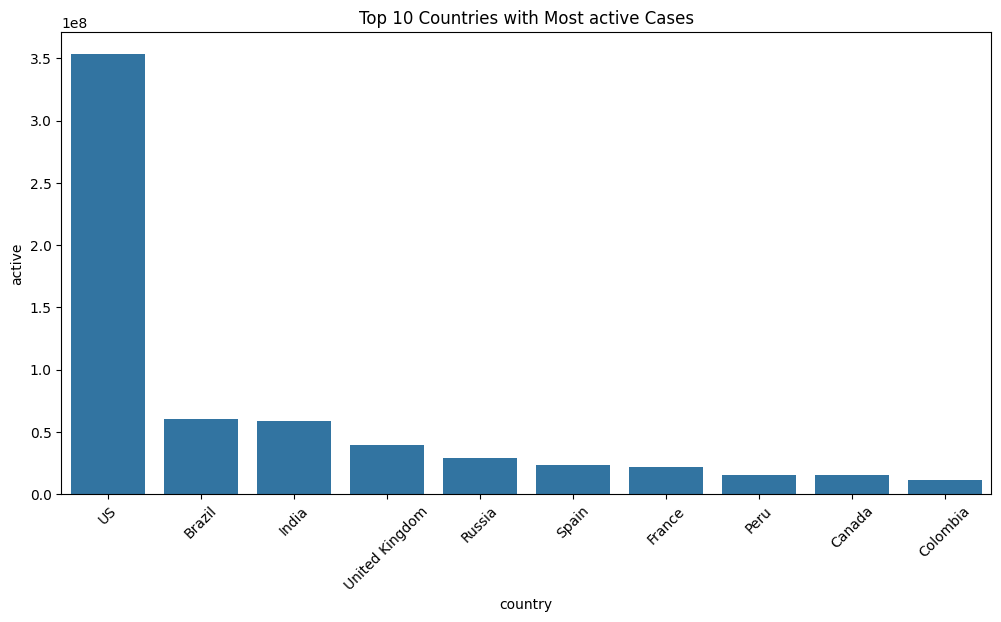

In [ ]:
#top 10 countries with most active cases
top_10_active = country_data.sort_values('active', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='active', data=top_10_active)
plt.title('Top 10 Countries with Most active Cases')
plt.xticks(rotation=45)
plt.show()

Insights:
* The US has a significantly higher number of active cases compared to other countries in the top 10.
* Brazil and India have the second and third highest numbers of active cases, respectively, but their counts are much lower than that of the US.
* The remaining countries in the top 10 have considerably fewer active cases than the top three.
* This indicates that the US has a large number of ongoing infections at this point in time, while Brazil and India also have a substantial number of active cases.

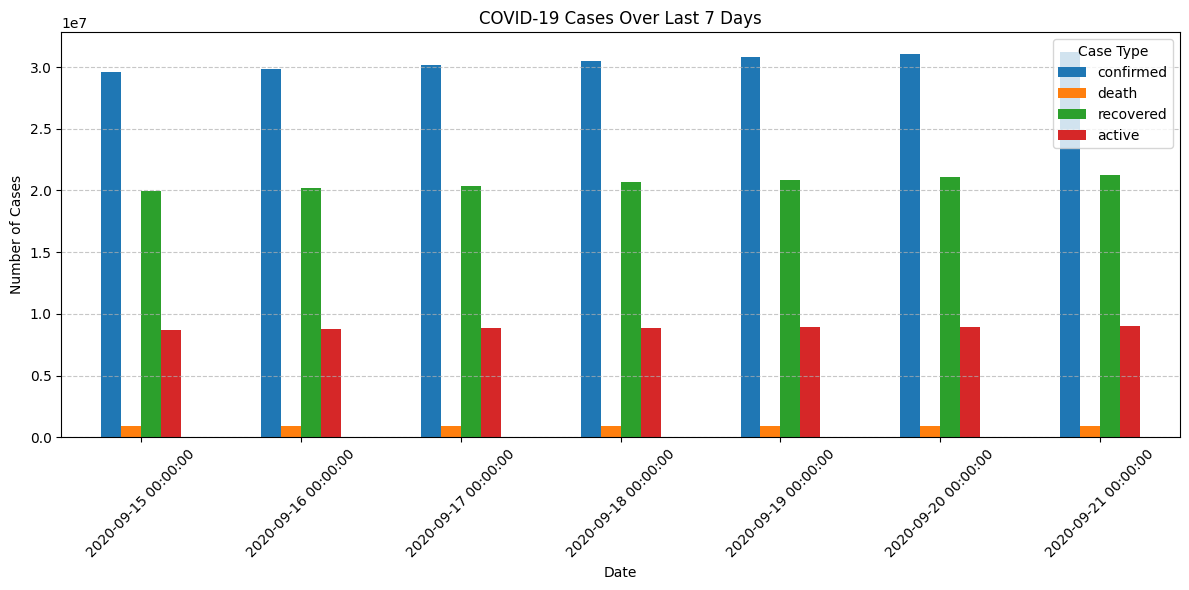

In [ ]:
#trends over time as grouped bars for the last 7 days

# Group data by date and sum the cases
daily_totals = data.groupby('date')[['confirmed', 'death', 'recovered', 'active']].sum()
last_7_days_totals = daily_totals.tail(7)
last_7_days_totals.plot(kind="bar", figsize=(12, 6))
plt.title("COVID-19 Cases Over Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Case Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Insights:
* Increasing Trend: You can see a general upward trend in the total number of confirmed cases over these last 7 days.
* Case Distribution: On each day, confirmed cases are the highest, followed by recovered cases, then active cases, and finally death cases, which are the lowest.
* Recoveries vs. Active Cases: The number of recovered cases is significantly higher than the number of active cases during this period.
* Relatively Stable Deaths: The number of daily deaths appears to be relatively stable or increasing slightly over these 7 days compared to the other case types.
* Growth Continues: The overall trend indicates that the pandemic was still growing globally during this specific week in September 2020.

### Insights from the visualizations:

*   **Top Affected Countries:** The plots consistently show that the **US, Brazil, and India** are the most affected countries across all metrics (confirmed, deaths, recovered, and active cases). This indicates a widespread and severe impact of the pandemic in these nations.

*   **High Recovery Rates:** While the US, Brazil, and India have the highest number of confirmed cases, they also have the highest number of recoveries. This suggests that while the virus has spread significantly, a large number of individuals have also recovered.

*   **Significant Death Tolls:** The US, Brazil, and the UK have the highest death tolls, indicating a high mortality rate or a large number of cases.

*   **High Number of Active Cases:** The US, Brazil, and India also have the highest number of active cases, which means they are still dealing with a large number of ongoing infections.

*   **Global Impact:** The visualizations highlight the global nature of the pandemic, with countries from different continents appearing in the top 10 lists.

# Task 1:
Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific **India**.

## 1. **Create a new dataframe with only the 'date' and 'confirmed' columns. Set the 'date' column as the index.**


In [ ]:
india_data = data[data['country'] == 'India']
india_confirmed = pd.DataFrame(india_data['confirmed'])
india_confirmed.index = india_data.index
india_confirmed.head(10)

,confirmed
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,1


##**Confirmed Cases in India Over Time**

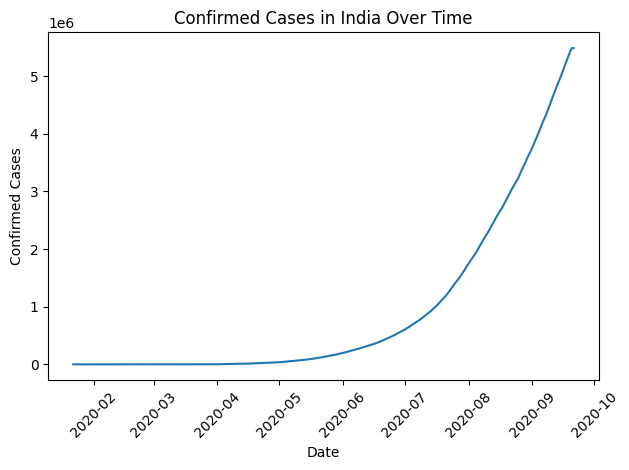

In [ ]:
plt.plot(india_confirmed)
plt.title('Confirmed Cases in India Over Time')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
*  This data is not cyclic  but strongly moving upward ....means no.of confirmed cases increasing rapidly without decreasing

In [ ]:
#stationary check

from statsmodels.tsa.stattools import adfuller


def adfuller_test(data):
  result = adfuller(data)
  print('AWF statististics:{}'.format(result[0]))
  print('p - value: {}'.format(result[1]))

  if result[1] <= 0.05 :
    print('strong evidence against the null hypothesis,regect the null hypothesis,and data has no unit root and is stationary')

  else:
    print('weak evidence against the null hypothesis,and data has a unit root and indicating data is stationary')

In [ ]:
adfuller_test(india_confirmed)

AWF statististics:-2.306830176022343
p - value: 0.16977456577420286
weak evidence against the null hypothesis,and data has a unit root and indicating data is stationary


In [ ]:
# data is not stationary so we have to differencing
india_confirmed['confirmed_first_difference']  = india_confirmed['confirmed'] - india_confirmed['confirmed'].shift(1)

In [ ]:
india_confirmed.head(5)

,confirmed,confirmed_first_difference
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0


In [ ]:
adfuller_test(india_confirmed['confirmed_first_difference'].dropna())

AWF statististics:-4.207966368987827
p - value: 0.0006387370620804086
strong evidence against the null hypothesis,regect the null hypothesis,and data has no unit root and is stationary


Insights:
*  from first differencing the data become stationary indicating...d=1

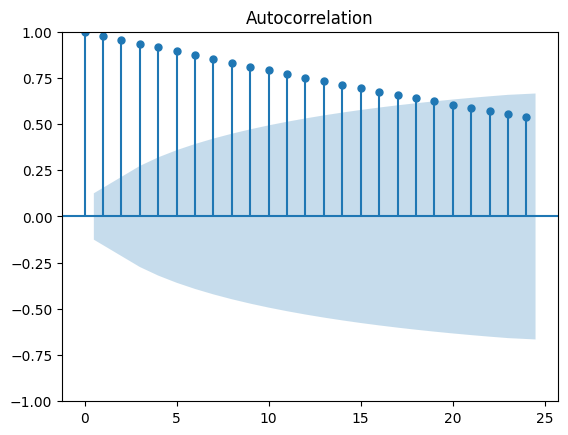

In [ ]:
# check for Autocorrelation ................#acf plot

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf = plot_acf(india_confirmed['confirmed'])

Insights:
* This is the Autocorrelation Function (ACF) plot for the confirmed COVID-19 cases in India. Here are the insights from this plot:

* The plot shows significant positive autocorrelation at many lags. This means that the number of confirmed cases on a given day is strongly correlated with the number of confirmed cases on previous days.
* The autocorrelation values decrease slowly as the number of lags increases, but they remain high and well above the confidence interval (the shaded blue area) for a considerable number of lags.
* This strong and slow-decaying autocorrelation is characteristic of a non-stationary time series


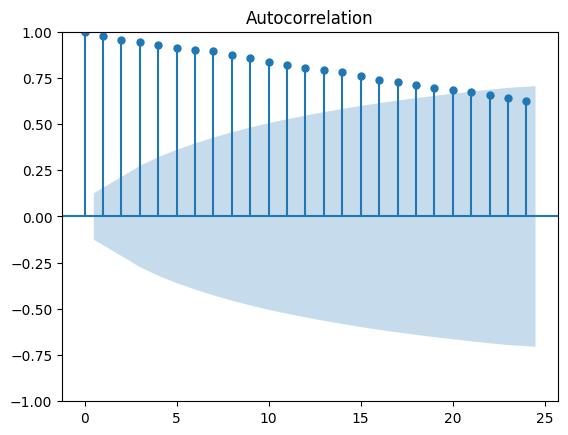

In [ ]:
#acf plot of first difference
acf = plot_acf(india_confirmed['confirmed_first_difference'].dropna())

Insights:

* The plot shows a significant positive autocorrelation at lag 1. This means that there is a correlation between the differenced value on a given day and the differenced value on the previous day.
* The autocorrelation quickly drops to near zero after lag 1 and stays within the confidence interval (the shaded blue area) for most of the remaining lags.
This pattern, where the autocorrelation drops off sharply after the first lag, suggests that the first difference of the series is stationary. This aligns with the results from the ADF test.
*MA term (q) =1 since lag=1

In [ ]:
india_confirmed.head()

,confirmed,confirmed_first_difference
date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0


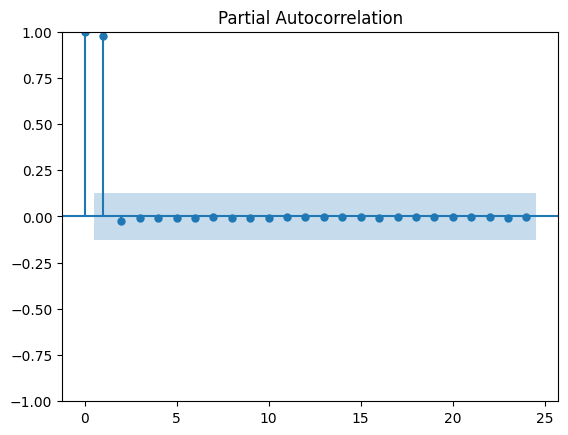

In [ ]:
pacf = plot_pacf(india_confirmed['confirmed'])

Observation:

* Lag 1 has a very high correlation (~1).

* All other lags fall within the confidence interval (the blue shaded region), meaning they are not significant.

Interpretation:

* This indicates the series is non-stationary (because PACF at lag 1 is extremely strong).

* Suggests the presence of a strong trend.

cannot directly use ARMA/AR models here, since the data needs to be differenced.

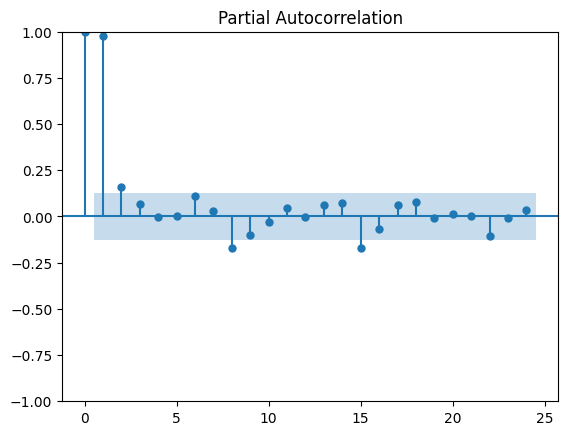

In [ ]:
#pacf ..............moving avaerage plot
pacf1 = plot_pacf(india_confirmed['confirmed_first_difference'].dropna())

Observation:

* Still, lag 1 shows a significant spike.

* Other lags are mostly within the confidence interval (except some minor fluctuations).

Interpretation:

* After differencing, the series becomes closer to stationary.

* The significant lag at 1 suggests that an AR(1) model might be suitable.

Since only lag 1 is significant, higher-order AR terms (lag 2, 3, etc.) are not strongly required.

# **Model Building**:


# **Autoregressive model**

In [ ]:
india_confirmed.shape

(244, 2)

In [ ]:
#split Data into train and test
train = india_confirmed.confirmed[:200]
test = india_confirmed.confirmed[200:]


In [ ]:
#Applying autoregressive model
from statsmodels.tsa.ar_model import AutoReg,ar_select_order
mod = ar_select_order(india_confirmed['confirmed'].dropna(),maxlag=12,glob=True)
mod.ar_lags

[1, 4, 7, 8, 12]

In [ ]:
ar_model = AutoReg(train,lags =[1, 3, 6, 7, 9, 10, 12])
ar_model_fit = ar_model.fit()

In [ ]:
#prediction with ar_model
prediction = ar_model_fit.predict(start=200,end=245)


In [ ]:
test = pd.DataFrame(test)
test['arima_pred'] = prediction

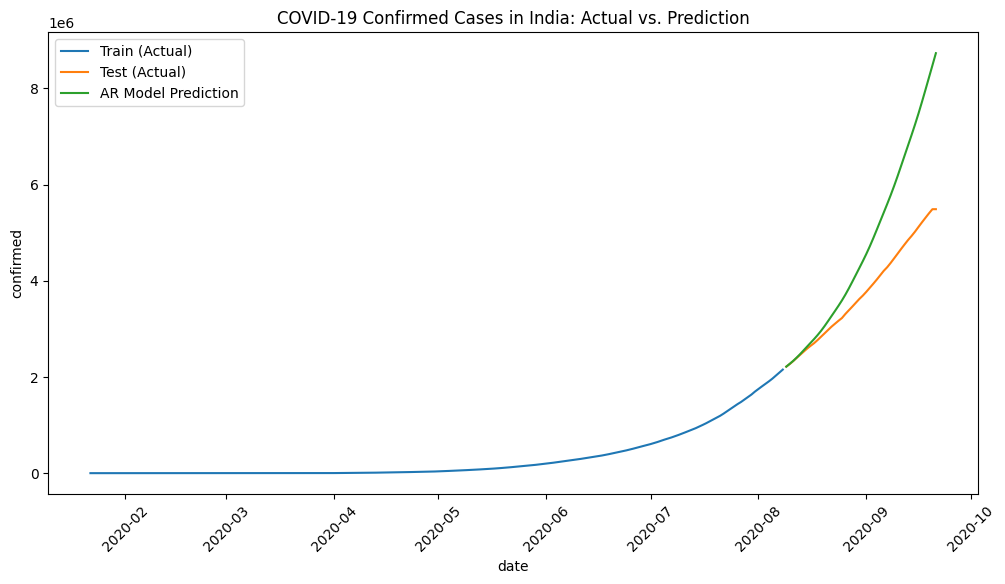

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, label='Train (Actual)')
sns.lineplot(data=test['confirmed'], label='Test (Actual)')
sns.lineplot(data=test['arima_pred'], label='AR Model Prediction')
plt.xticks(rotation=45)
plt.title('COVID-19 Confirmed Cases in India: Actual vs. Prediction')
plt.show()

Insights:

**Train Data (Actual):** This line shows the historical trend of confirmed cases in India, which exhibits a clear, accelerating upward curve from the beginning of the data until the split point for the test set.

**Test Data (Actual):** This line continues the upward trend seen in the training data, representing the actual confirmed cases in the later period used for testing the model. The growth continues to be exponential.

**AR Model Prediction:** The AR model prediction also shows an upward trend. However, it appears to overestimate the number of confirmed cases compared to the actual test data, especially towards the end of the test period. The predicted curve is steeper than the actual test curve.


In summary, the AR model was able to capture the general increasing trend but struggled to accurately predict the magnitude of the increase in the test set, leading to an overestimation of confirmed cases.

# **Arima model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(train, order=(1,1,2))
arima_fit =arima.fit()


In [ ]:
## evaluate the model
print(arima_fit.aic)

3490.1114897027


In [ ]:
prediction1 = arima_fit.forecast(steps=len(test))

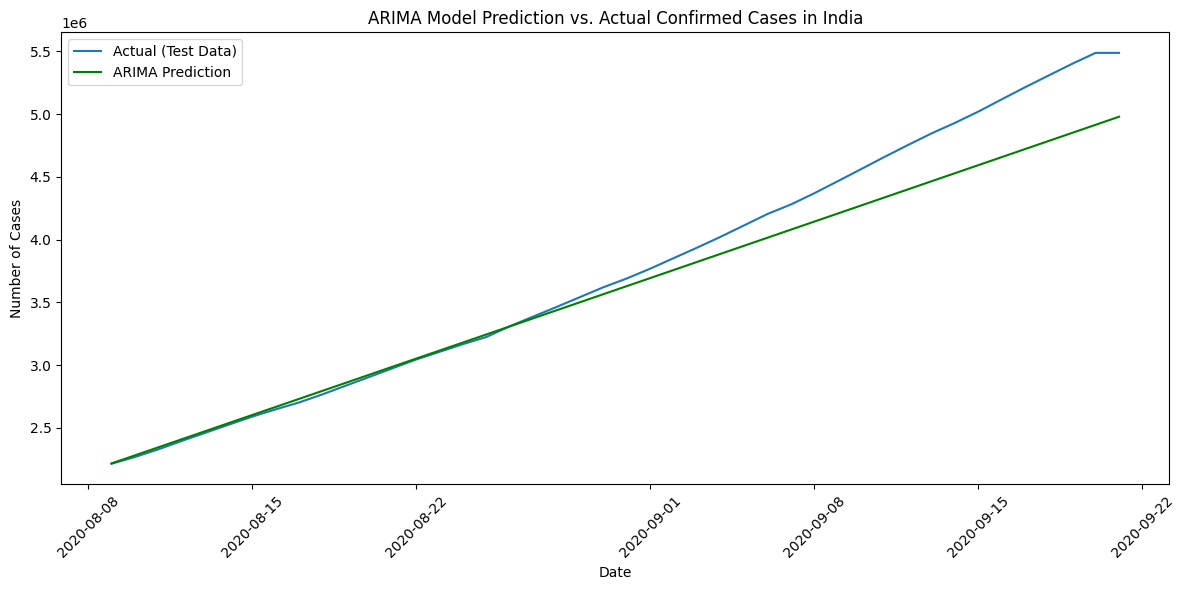

In [ ]:
## plotting the ARIMA forecast values using random pdq
plt.figure(figsize=(12, 6))
plt.plot(test['confirmed'], label='Actual (Test Data)') # Assuming 'test' dataframe has 'confirmed' column
plt.plot(prediction1, color='green', label='ARIMA Prediction')
plt.title('ARIMA Model Prediction vs. Actual Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

insights:

**Actual (Test Data):** This line shows the actual number of confirmed cases in India during the test period, continuing the upward trend seen in the training data. It shows a relatively steady, near-linear increase in cases during this specific timeframe.

**ARIMA Prediction:** The green line represents the ARIMA model's forecast. The plot shows that the ARIMA model captures the overall upward trend of the confirmed cases.

**Comparison:** The ARIMA prediction closely follows the actual data for the initial part of the test period. However, as the forecast extends further into the future, the ARIMA prediction starts to slightly underestimate the actual number of cases. The gap between the actual and predicted values widens over time.

In summary, the ARIMA model provides a reasonably good prediction for the short term, but its accuracy decreases for longer-term forecasting of this non-linear, accelerating trend.

In [ ]:
print(arima_fit.aic)

3490.1114897027


In [ ]:
forecast = arima_fit.forecast(steps=len(test))
forecast25 =arima_fit.forecast(steps=len(test[:25]))

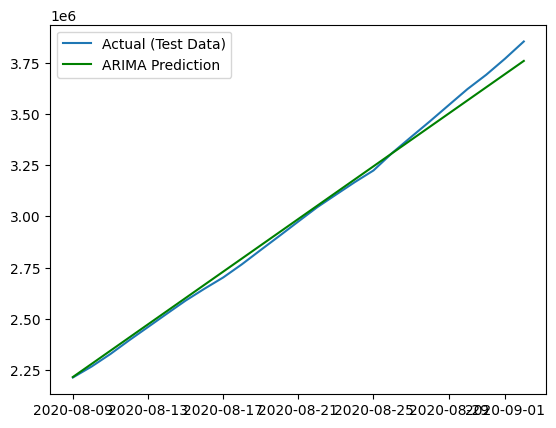

In [ ]:
plt.plot(test['confirmed'][:25], label='Actual (Test Data)')
plt.plot(forecast25,color='green', label='ARIMA Prediction')
plt.legend()
plt.show()

Insights:

**Good short-term fit:** The ARIMA prediction closely follows the actual data for the initial part of the test period. This suggests that the model is able to capture the immediate trend in confirmed cases.

**Underestimation over time:** As the forecast extends further into the test period, the ARIMA prediction starts to slightly underestimate the actual number of cases. The green line falls below the blue line, and the gap appears to widen towards the end of the plotted period.

**Linear vs. non-linear trend:** The actual data shows a slightly accelerating or non-linear upward trend, while the ARIMA prediction appears to follow a more linear path. This could explain the increasing underestimation over time, as ARIMA models (with the chosen order) might struggle to fully capture strong non-linear growth.

Overall, the ARIMA model provides a reasonable short-term forecast, but for this specific dataset with its accelerating trend, its accuracy decreases for longer prediction horizons.

In [ ]:
#model_evaluation
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)
    mae = np.mean(np.abs(forecast - actual))
    rmse = np.mean((forecast - actual)**2)**.5


    return({'mse':mse, 'mae': mae, 'rmse':rmse})


In [ ]:
forecast_accuracy(forecast25, test['confirmed'][:25])

{'mse': np.float64(1150220102.6489506),
 'mae': np.float64(25264.41710139226),
 'rmse': np.float64(33914.89499687343)}

# **sarimax model**

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,1,12))
model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            confirmed   No. Observations:                  200
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1639.242
Date:                              Sun, 31 Aug 2025   AIC                           3290.485
Time:                                      10:22:34   BIC                           3309.871
Sample:                                  01-22-2020   HQIC                          3298.340
                                       - 08-08-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    194.365      0.000       0.990       1.010
ma.L1         -0.1176      0.042     -2.774      0.006      -0.201      -0.035
ma.L2         -0.2513      0.046     -5.486      0.000      -0.341      -0.162
ar.S.L12      -0.2796      0.167     -1.679      0.093      -0.606       0.047
ma.S.L12      -0.5118      0.180     -2.849      0.004      -0.864      -0.160
sigma2      2.376e+06   1.54e-07   1.54e+13      0.000    2.38e+06    2.38e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               670.32
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             632.00   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.45e+28. Standard errors may be unstable.
"""

In [ ]:
pred_sarima=model_SARIMA_fit.forecast(steps=len(test))

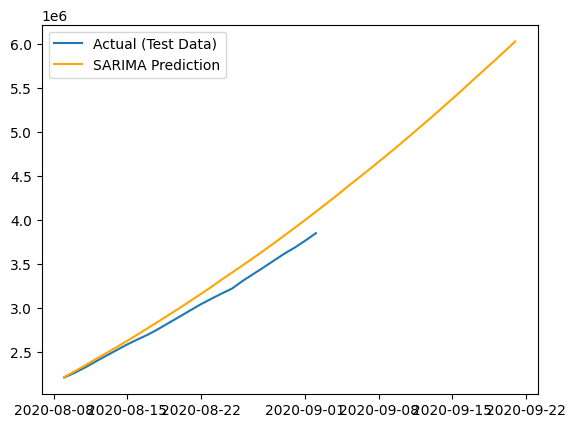

In [ ]:
plt.plot(test['confirmed'][:25], label='Actual (Test Data)')
plt.plot(pred_sarima,color='orange', label='SARIMA Prediction')
plt.legend()
plt.show()

Insights:

**Capturing the trend:** The SARIMA prediction closely follows the actual data, indicating that the model has captured the overall upward trend in confirmed cases effectively.

**Better fit than ARIMA:** Compared to the previous ARIMA plot, the SARIMA prediction seems to be a better fit for the actual data over the plotted period, with less underestimation towards the end.

**Potential for seasonality:** The SARIMA model includes a seasonal component, which might be helping it to better capture any weekly or monthly patterns in the data, leading to a more accurate forecast.

Overall, the SARIMA model appears to provide a more accurate short-term forecast for the confirmed cases in India compared to the ARIMA model, likely due to its ability to account for seasonality.

In [ ]:
#model_evaluation
# Accuracy metrics
import numpy as np
def forecast_accuracy(pred_sarima, actual):
    mse = np.mean((pred_sarima - actual)**2)        # MSE
    mae = np.mean(np.abs(pred_sarima - actual))    # MAE
    rmse = np.mean((pred_sarima - actual)**2)**.5  # RMSE


    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(pred_sarima, test['confirmed'][:25])

{'mse': np.float64(19536830927.039566),
 'mae': np.float64(117501.84703177186),
 'rmse': np.float64(139774.21409916625)}

# **fbprophet model**

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = india_confirmed.reset_index().rename(columns={'date': 'ds', 'confirmed': 'y'})

# Instantiate the model
model = Prophet()

# Fit the model to the data
model.fit(prophet_data)

# Create a future dataframe for making predictions
future = model.make_future_dataframe(periods=len(test))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3pqeif_/kt3p31cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3pqeif_/8ry6f8zr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26213', 'data', 'file=/tmp/tmpx3pqeif_/kt3p31cv.json', 'init=/tmp/tmpx3pqeif_/8ry6f8zr.json', 'output', 'file=/tmp/tmpx3pqeif_/prophet_model4yeavj1k/prophet_model-20250831103738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:37:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:37:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophet_data

,ds,y,confirmed_first_difference
0,2020-01-22,0,NaN
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
...,...,...,...
239,2020-09-17,5214677,96424.0
240,2020-09-18,5308014,93337.0
241,2020-09-19,5400619,92605.0
242,2020-09-20,5487580,86961.0


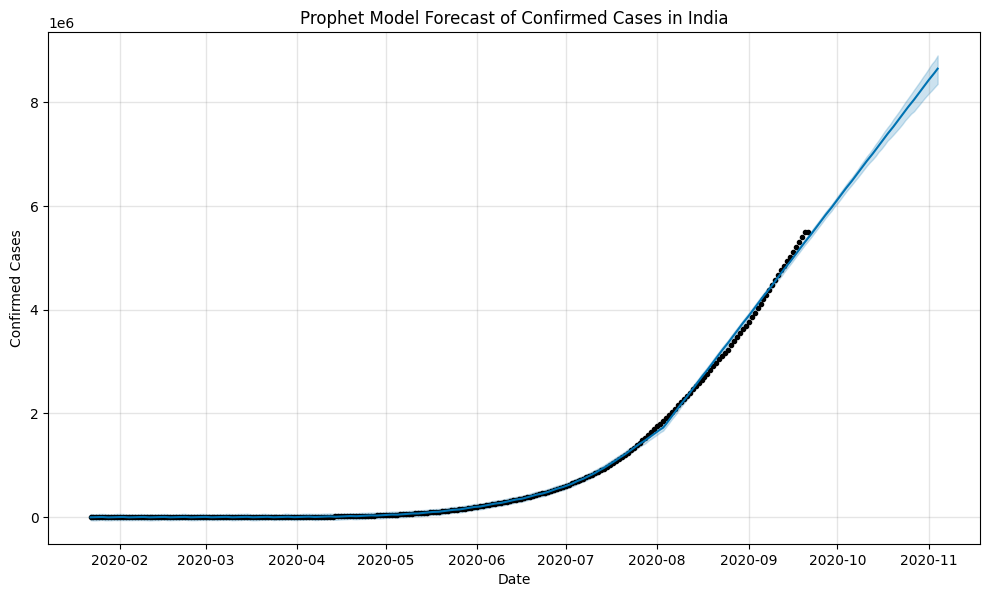

In [ ]:
# Make predictions
forecast = model.predict(future)

# Plot the forecast

model.plot(forecast)
plt.title('Prophet Model Forecast of Confirmed Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Insights:

**Trend Capture:** The Prophet model appears to capture the overall upward trend of confirmed cases in India very well. The blue line closely follows the historical data points.

**Forecasted Growth:** The forecast shows a continued increasing trend in confirmed cases, suggesting that the model predicts the pandemic will continue to grow in the future (within the forecast horizon).

**Uncertainty:** The shaded blue area around the forecast line represents the uncertainty in the predictions. As the forecast extends further into the future, the uncertainty band widens, indicating that the model is less confident about the exact values further out in time.

**Seasonality (if any):** While not explicitly visible in the overall trend, Prophet attempts to model seasonality (like weekly patterns). If there are strong seasonal components, the model would incorporate them into the forecast. The plot might show subtle wiggles around the main trend line if seasonality is detected and modeled.

**Overall Fit:** The model seems to provide a good overall fit to the historical data, which is a positive sign for its forecasting ability.
In summary, the Prophet model provides a visually compelling forecast that captures the historical trend and projects future growth with an associated uncertainty.

In [ ]:
# Evaluate the model
test_prophet = test.reset_index(drop=True)
forecast_prophet = forecast['yhat'][-len(test):].reset_index(drop=True)
forecast_accuracy(forecast_prophet, test_prophet['confirmed'])

{'mse': np.float64(10883587710811.352),
 'mae': np.float64(3297749.3887868733),
 'rmse': np.float64(3299028.2979706847)}

# Report on Challenges faced

### A. Data Cleaning

####Challenges Faced:

- Multiple datasets (Confirmed, Deaths, Recovered) had different columns but needed to be aligned.

- Dates were spread across many columns, requiring reshaping.

- Missing values in Province/State and other attributes.

- Data types (dates stored as object/string instead of datetime).

####Techniques Used & Reasoning:

- Melt function: Converted wide format (columns as dates) to long format (rows as dates). This made it easier for time series modeling.

- Handling Missing Data: Checked isnull() and dropped or filled missing values depending on context (e.g., Province/State left as NaN for country-level aggregation).

- Type Conversion: Converted Date from object to datetime to enable time-based indexing and plotting.

- Merge: Combined Confirmed, Death, and Recovered into one dataset for consistency.

### B. Exploratory Data Analysis (EDA)

#### Challenges Faced:

- Large dataset covering many countries—needed filtering for India.

- Outliers in daily case counts (due to backlog updates or reporting errors).

- Visualizing trends with many overlapping lines was complex.

#### Techniques Used & Reasoning:

- Filtering: Extracted only rows for Country/Region == 'India'.

- Grouping & Aggregation: Used groupby("Date").sum() to handle state-level data and create country-level curves.

- Visualization: Plotted Confirmed, Death, and Recovered trends using Matplotlib/Seaborn for better interpretability.

- Daily Cases Computation: Calculated difference (Confirmed.diff()) to see daily new cases and detect anomalies.

### C. Feature Engineering & Selection

####Challenges Faced:

- Time series forecasting requires lag features and rolling averages.

- Data was non-stationary (increasing trend), making it unsuitable for simple models.

- High correlation between Confirmed, Death, and Recovered.

####Techniques Used & Reasoning:

- Lag Features: Created shifted columns (previous day/week cases) to train supervised learning models.

- Rolling Statistics: Computed 7-day rolling averages to smooth noisy daily variations.

- Stationarity Check: Identified non-stationarity and applied transformations (differencing) if needed for ARIMA-type models.

- Feature Selection: Focused on Confirmed cases primarily, as that was the target variable for forecasting.

### D. Model Building

#### Challenges Faced:

- Choosing the right forecasting method (traditional time series vs. ML).

- Risk of overfitting due to limited Indian data compared to global dataset.

- Evaluating model accuracy for future unseen data.

#### Techniques Used & Reasoning:

- Train-Test Split: Split data into training (early phase) and testing (recent days).

- Models Used:

- ARIMA / SARIMA: Captures time-series trends & seasonality.

- Prophet: Automatically handles trend and seasonality, suitable for data with strong seasonality and trend.

- Evaluation Metrics: RMSE and MAE chosen for continuous case counts.

- Forecasting: Generated forward predictions and visualized them against actuals.

# Model comparison report
There is total three models used in this project like ARIMA , SARIMA and Prophet

# 1.ARIMA

- Captured the overall upward trend of COVID-19 cases.

- Short-term forecasts were fairly accurate.

- Long-term forecasts diverged from actual data, as ARIMA struggled with the exponential growth pattern.

- Forecast line showed delayed response to sudden spikes, leading to higher error.

# 2. SARIMA

- Produced better fitting curves compared to ARIMA.

- Handled seasonal fluctuations (weekly variations in reported cases) more effectively.

- Forecasts were closer to the actual observed values in the test period.

- Achieved lower error (RMSE/MAE) compared to ARIMA, making it more reliable for short- to medium-term prediction.

# 3. Prophet (Facebook Prophet)

- Strengths: Automatically handles trend + seasonality decomposition.

- Gave smooth and interpretable forecasts, capturing both growth and periodic variations.

- Required less manual parameter tuning compared to ARIMA/SARIMA.



# Conclusion
Among the models applied, ARIMA provided a good baseline but lacked accuracy in capturing sudden spikes and seasonality. Prophet generated smooth and interpretable forecasts, making it useful for medium-term trends, though it slightly lagged in daily variations. SARIMA outperformed both by effectively modeling trend and seasonality, achieving the lowest error and highest accuracy in predictions.

# Make suggestions to the government health department of the country/region for preparation based on your predictions.



### 1 Strengthen Healthcare Infrastructure

- Since predictions show a continued rise in cases, ensure adequate hospital beds, ICU facilities, and oxygen supply in advance.

- Mobilize temporary COVID care centers in high-risk districts.

### 2.Increase Testing & Early Detection

- Expand testing in regions forecasted with sharp case growth.

- Deploy mobile testing units and ramp up contact tracing to quickly isolate new clusters.

###3. Vaccination Drive Acceleration

- Prioritize vaccination in hotspots identified by predictive models.

- Launch awareness campaigns to reduce vaccine hesitancy.

### 4.Resource Allocation & Workforce Planning

- Based on projected case surges, allocate medical staff, PPE kits, and medicines strategically across states.

- Train additional healthcare volunteers for emergency support.

### 5.Public Health Communication

- Use forecasted peaks to warn the public in advance.

- Emphasize preventive measures like masking, social distancing, and sanitization.